### **ECDF** (Empirical Cumulative Distribution Function)

An empirical distribution function is the function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any **specified value** of the measured variable is **the fraction of observations** of the measured variable that are **less than or equal to the specified value**.

No contexto do Enade, temos que o ECDF apresenta a fração $\mathcal{Y}$ de cursos de computação que apresentam uma porcentagem menor ou igual a $\mathcal{X}$ de alunos que escolheram a alternativa "Nenhum" para uma determinada questão.

Pergunta: Se não tivéssemos feito a transformação dos valores para porcentagens, estaria tudo certo? Ou transformar para porcentagens foi necessário? A normalização faria mesma coisa? Como a normalização faz parte do Pipeline de treinamento do modelo e não da formação do conjunto em si, talvez a transformação como operação canônica para formação do conjunto tem seu valor?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns1

from scipy import stats, special

from scipy.stats import kstwo
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import math

### **K-S Test do zero**

In [2]:
# enade_treino = pd.read_csv("../../concept_drift/tabela_final_2017_tres_anos_treinamento.csv")
enade_treino = pd.read_csv("../../concept_drift/cursos_grad_publicos_2011.csv")
print(enade_treino["Numero_Participantes"].mean())
print(len(enade_treino["Numero_Participantes"]))

0.8597225539524855
241


In [3]:
# enade_teste = pd.read_csv("../../concept_drift/tabela_final_2021_tres_anos_treinamento.csv")
enade_teste = pd.read_csv("../../concept_drift/cursos_grad_publicos_2014.csv")
print(enade_teste["Numero_Participantes"].mean())
print(len(enade_teste["Numero_Participantes"]))

0.8590378724020027
400


In [47]:
atributo = "Não se aplica.1"

In [48]:
# Create a sorted series of unique data (from the measured variable "Nenhum")
# The unique operation is done for the sake of the evenly spaced sequence operation below
# The sorting is for the probability calculation of each x_values in the loop
data_points = np.sort(enade_treino[atributo].unique())

# X-data for the ECDF: evenly spaced sequence of the uniques
# By doing this (evenly spaced sequence), the graph is smooth until the end
# Step function (for the evenly spaced sequence): (stop - start)/(num - 1)
x_values = np.linspace(start=min(data_points), stop=max(data_points),num=len(data_points))

In [49]:
# Total number of observations
data_size_treino = enade_treino[atributo].size

# Y-data for the ECDF:
y_values_treino = []

for i in x_values:
    # All the values in raw data less than the ith value in x_values
    temp = enade_treino[atributo][enade_treino[atributo] <= i]
    
    # Fraction of that range of values with respect to the total number of observations
    value = temp.size / data_size_treino
    
    # Pushing the fraction (cumulative probability of the ith value in x_values) in the y_values
    y_values_treino.append(value)

In [50]:
# Total number of observations
data_size_teste = enade_teste[atributo].size

# Y-data for the ECDF:
y_values_teste = []

for i in x_values:
    # All the values in raw data less than the ith value in x_values
    temp = enade_teste[atributo][enade_teste[atributo] <= i]
    
    # Fraction of that range of values with respect to the total number of observations
    value = temp.size / data_size_teste
    
    # Pushing the fraction (cumulative probability of the ith value in x_values) in the y_values
    y_values_teste.append(value)

In [51]:
# Calculate the K-S test metric for two CDF 'teste' e 'treino' on the measured variable

differences = []
maxx = 0

for i in range(0, len(x_values)):
    diff = y_values_teste[i] - y_values_treino[i]
    differences
    
    if diff < 0:
        diff = diff * -1
   
    if diff > maxx:
        maxx = diff

print(maxx)

0.9562766643010384


#### **Gráficos**

<Axes: ylabel='Frequency'>

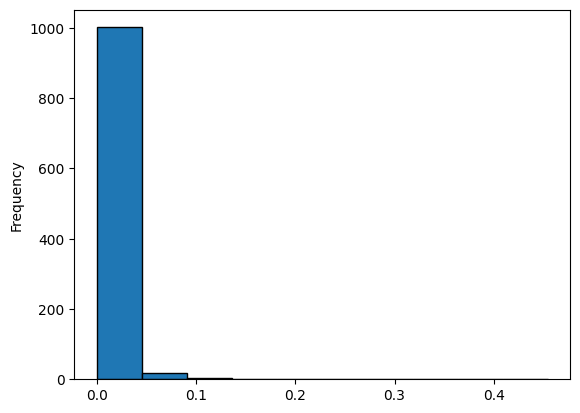

In [53]:
enade_treino[atributo].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

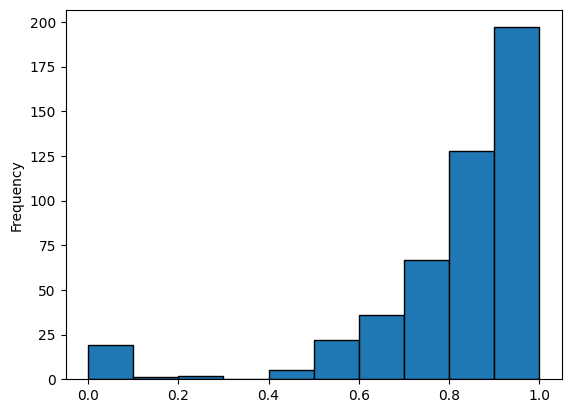

In [54]:
enade_teste[atributo].plot(kind='hist', edgecolor='black')

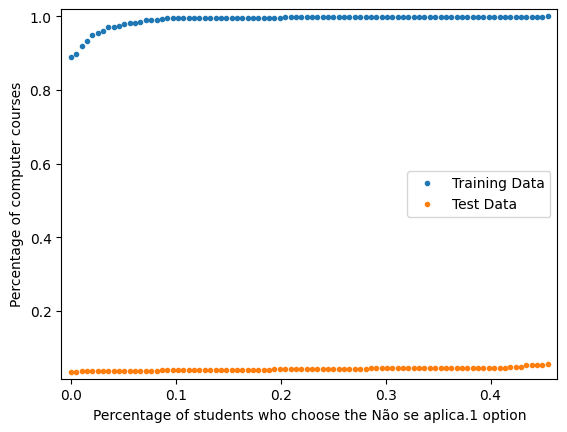

In [55]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values_treino, marker='.', linestyle='none', label='Training Data')
ax.plot(x_values, y_values_teste, marker='.', linestyle='none', label='Test Data')

ax.set_xlabel(f"Percentage of students who choose the {atributo} option")
ax.set_ylabel("Percentage of computer courses")
ax.legend()
ax.margins(0.02)

plt.show()

### **K-S Test usando a biblioteca Scipy**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns1

from scipy import stats, special

from scipy.stats import kstwo
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import math

#### Criterio de divisão: Público/Privado

In [9]:
# enade_treino = pd.read_csv("../criterios_divisao/Publico_Privado/cursos_grad_publicos_2017.csv")
# enade_teste = pd.read_csv("../criterios_divisao/Publico_Privado/cursos_grad_publicos_2021.csv")

# enade_treino = pd.read_csv("../criterios_divisao/Publico_Privado/cursos_grad_publicos_universidade_2017.csv")
# enade_teste = pd.read_csv("../criterios_divisao/Publico_Privado/cursos_grad_publicos_universidade_2021.csv")

#### Criterio de divisão: CE

In [33]:
enade_treino = pd.read_csv("../criterios_divisao/CE/cursos_grad_CE2_2011.csv")
enade_teste = pd.read_csv("../criterios_divisao/CE/cursos_grad_CE2_2014.csv")

In [34]:
column_names = enade_treino.columns

In [35]:
len(column_names)

227

### Utilizando P-value 0,5 como threshold 

In [103]:
drifted_columns_threshold_pvalue = {}

pvalue = 0.05

for index in range(enade_treino.shape[1] - 1):
    valores_treino = enade_treino.iloc[:, index]
    valores_teste = enade_teste.iloc[:, index]
    
    result = stats.ks_2samp(valores_treino, valores_teste)
    
    if result.pvalue < pvalue:
        drifted_columns_threshold_pvalue[column_names[index]] = (result.statistic, result.pvalue, True)
    else:
        drifted_columns_threshold_pvalue[column_names[index]] = (result.statistic, result.pvalue, True)

list_drifted_columns_threshold_pvalue = list(drifted_columns_threshold_pvalue.items())
sorted_drifted_columns_threshold_pvalue = sorted(drifted_columns_threshold_pvalue.items(), key=lambda column:column[1])

### Utilizando Valor Crítico como threshold 

In [36]:
m = len(enade_treino)
n = len(enade_teste)

In [37]:
drifted_columns_criticalvalue = {}

critical_value = 1.36 * math.sqrt((m + n)/(m*n))

for index in range(enade_treino.shape[1]):
    valores_treino = enade_treino.iloc[:, index]
    valores_teste = enade_teste.iloc[:, index]
    
    result = stats.ks_2samp(valores_treino, valores_teste)
    
    if result.statistic >= critical_value:
        drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, True)
    else:
        drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, False)

list_drifted_columns_criticalvalue = list(drifted_columns_criticalvalue.items())

sorted_drifted_columns_criticalvalue = sorted(drifted_columns_criticalvalue.items(), reverse=True, key=lambda column:column[1])

atributos_curso = ['ADS', 'BCC', 'EC', 'GTI', 'LCC', 'RC', 'SI',
                  'RO','AC', 'AM','RR','PA','AP','TO','MA','PI',
                   'CE','RN','PB','PE','AL','SE','BA','MG','ES',
                   'RJ','SP','PR','SC','RS','MS','MT','GO', 'DF',
                  'N', 'NE', 'SE', 'SUL', 'CO', 'Pública Federal', 
                   'Pública Estadual', 'Pública Municipal', 'Privada CFL', 
                   'Privada SFL', 'CEFET', 'Centro Universitário', 'Faculdade', 
                   'IFECT', 'Universidade', 'Matutino', 'Vespertino', 'Integral', 'Noturno']

course_drift_results = {atributo: drifted_columns_criticalvalue[atributo] for atributo in atributos_curso}
sorted_course_drift_results = sorted(course_drift_results.items(), reverse=True, key=lambda column:column[1])

### Resultados

In [38]:
df_drift_scores_edicao = pd.DataFrame(list_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(df_drift_scores_edicao['Resultado'].tolist(), index=df_drift_scores_edicao.index)
df_drift_scores_edicao = df_drift_scores_edicao.drop('Resultado', axis=1)

In [39]:
sorted_df_drift_scores_edicao = pd.DataFrame(sorted_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
sorted_df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_edicao['Resultado'].tolist(), index=sorted_df_drift_scores_edicao.index)
sorted_df_drift_scores_edicao = sorted_df_drift_scores_edicao.drop('Resultado', axis=1)

In [40]:
sorted_df_drift_scores_course_attributes = pd.DataFrame(sorted_course_drift_results, columns=['Alternativa', 'Resultado'])
sorted_df_drift_scores_course_attributes[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_course_attributes['Resultado'].tolist(), index=sorted_df_drift_scores_course_attributes.index)
sorted_df_drift_scores_course_attributes = sorted_df_drift_scores_course_attributes.drop('Resultado', axis=1)

In [41]:
df_drift_scores_edicao

,Alternativa,Drift_Score,P-value,Detected
0,Codigo_do_Curso,0.216667,0.079330,False
1,Numero_Notas_Invalidas,0.013889,1.000000,False
2,Numero_Faltantes,0.277778,0.010226,True
3,Numero_Participantes,0.280556,0.009202,True
4,ADS,0.083333,0.961420,False
...,...,...,...,...
222,Regular_Formacao,0.150000,0.411210,False
223,Fraca_Formacao,0.088889,0.936405,False
224,Muito fraca_Formacao,0.088889,0.936405,False
225,Não sei responder_Formacao,0.108333,0.795734,False


In [42]:
sorted_df_drift_scores_edicao

,Alternativa,Drift_Score,P-value,Detected
0,Não sei responder_Condicao_Salas,0.305556,0.003389,True
1,3-5_Qtde_Livros,0.291667,0.005969,True
2,Não sei responder_Condicao_Praticas,0.291667,0.005969,True
3,Numero_Participantes,0.280556,0.009202,True
4,Fundamental 6-9_Nl_Mae,0.280556,0.009202,True
...,...,...,...,...
222,SUL,0.000000,1.000000,False
223,CEFET,0.000000,1.000000,False
224,nulos_Sexo,0.000000,1.000000,False
225,Nenhuma_Horas_de_Estudo,0.000000,1.000000,False


In [43]:
sorted_df_drift_scores_edicao.query("Alternativa == 'Nota_Conceito_Faixa'")

,Alternativa,Drift_Score,P-value,Detected
226,Nota_Conceito_Faixa,0.0,1.0,False


In [44]:
sorted_df_drift_scores_course_attributes

,Alternativa,Drift_Score,P-value,Detected
0,Privada CFL,0.191667,0.158171,False
1,Privada SFL,0.166667,0.289206,False
2,EC,0.100000,0.864512,False
3,SP,0.100000,0.864512,False
4,GTI,0.097222,0.884711,False
5,Faculdade,0.094444,0.903699,False
6,ADS,0.083333,0.961420,False
7,DF,0.066667,0.996355,False
8,MG,0.063889,0.997930,False
9,N,0.061111,0.998908,False


In [45]:
df_drift_scores_edicao.to_csv(f'../drift_results/CE/div_criterio_CE1_17-21_drift_result.csv',index=False)

In [46]:
sorted_df_drift_scores_edicao.to_csv(f'../drift_results/CE/div_criterio_CE1_17-21_sorted_drift_result.csv',index=False)

In [47]:
sorted_df_drift_scores_course_attributes.to_csv(f'../drift_results/CE/div_criterio_CE1_17-21_sorted_drift_result_courses_att.csv',index=False)

### Automatização

#### Entre mesmas categorias

In [56]:
Regiao = "Centroeste"

for par_edicao in [(2011, 2014, "11-14"), (2014, 2017, "14-17"), (2017, 2021, "17-21")]:
    enade_treino = pd.read_csv(f"../criterios_divisao/Regiao/cursos_grad_{Regiao}_{par_edicao[0]}.csv")
    enade_teste = pd.read_csv(f"../criterios_divisao/Regiao/cursos_grad_{Regiao}_{par_edicao[1]}.csv")
    column_names = enade_treino.columns

    m = len(enade_treino)
    n = len(enade_teste)

    drifted_columns_criticalvalue = {}

    critical_value = 1.36 * math.sqrt((m + n)/(m*n))

    for index in range(enade_treino.shape[1]):
        valores_treino = enade_treino.iloc[:, index]
        valores_teste = enade_teste.iloc[:, index]

        result = stats.ks_2samp(valores_treino, valores_teste)

        if result.statistic >= critical_value:
            drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, True)
        else:
            drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, False)

    list_drifted_columns_criticalvalue = list(drifted_columns_criticalvalue.items())

    sorted_drifted_columns_criticalvalue = sorted(drifted_columns_criticalvalue.items(), reverse=True, key=lambda column:column[1])

    atributos_curso = ['ADS', 'BCC', 'EC', 'GTI', 'LCC', 'RC', 'SI',
                      'RO','AC', 'AM','RR','PA','AP','TO','MA','PI',
                       'CE','RN','PB','PE','AL','SE','BA','MG','ES',
                       'RJ','SP','PR','SC','RS','MS','MT','GO', 'DF',
                      'N', 'NE', 'SE', 'SUL', 'CO', 'Pública Federal', 
                       'Pública Estadual', 'Pública Municipal', 'Privada CFL', 
                       'Privada SFL', 'CEFET', 'Centro Universitário', 'Faculdade', 
                       'IFECT', 'Universidade', 'Matutino', 'Vespertino', 'Integral', 'Noturno']

    course_drift_results = {atributo: drifted_columns_criticalvalue[atributo] for atributo in atributos_curso}
    sorted_course_drift_results = sorted(course_drift_results.items(), reverse=True, key=lambda column:column[1])

    df_drift_scores_edicao = pd.DataFrame(list_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
    df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(df_drift_scores_edicao['Resultado'].tolist(), index=df_drift_scores_edicao.index)
    df_drift_scores_edicao = df_drift_scores_edicao.drop('Resultado', axis=1)

    sorted_df_drift_scores_edicao = pd.DataFrame(sorted_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
    sorted_df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_edicao['Resultado'].tolist(), index=sorted_df_drift_scores_edicao.index)
    sorted_df_drift_scores_edicao = sorted_df_drift_scores_edicao.drop('Resultado', axis=1)

    sorted_df_drift_scores_course_attributes = pd.DataFrame(sorted_course_drift_results, columns=['Alternativa', 'Resultado'])
    sorted_df_drift_scores_course_attributes[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_course_attributes['Resultado'].tolist(), index=sorted_df_drift_scores_course_attributes.index)
    sorted_df_drift_scores_course_attributes = sorted_df_drift_scores_course_attributes.drop('Resultado', axis=1)

    df_drift_scores_edicao.to_csv(f'../drift_results/Regiao/div_criterio_{Regiao}_{par_edicao[2]}_drift_result.csv',index=False)
    sorted_df_drift_scores_edicao.to_csv(f'../drift_results/Regiao/div_criterio_{Regiao}_{par_edicao[2]}_sorted_drift_result.csv',index=False)
    sorted_df_drift_scores_course_attributes.to_csv(f'../drift_results/Regiao/div_criterio_{Regiao}_{par_edicao[2]}_sorted_drift_result_courses_att.csv',index=False)

#### Entre categorias diferentes

In [59]:
CE_3 = "CE3"
CE_4 = "CE4"

for edicao in [2011, 2014, 2017, 2021]:
    enade_treino = pd.read_csv(f"../criterios_divisao/CE/cursos_grad_{CE_3}_{edicao}.csv")
    enade_teste = pd.read_csv(f"../criterios_divisao/CE/cursos_grad_{CE_4}_{edicao}.csv")
    column_names = enade_treino.columns

    m = len(enade_treino)
    n = len(enade_teste)

    drifted_columns_criticalvalue = {}

    critical_value = 1.36 * math.sqrt((m + n)/(m*n))

    for index in range(enade_treino.shape[1]):
        valores_treino = enade_treino.iloc[:, index]
        valores_teste = enade_teste.iloc[:, index]

        result = stats.ks_2samp(valores_treino, valores_teste)

        if result.statistic >= critical_value:
            drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, True)
        else:
            drifted_columns_criticalvalue[column_names[index]] = (result.statistic, result.pvalue, False)

    list_drifted_columns_criticalvalue = list(drifted_columns_criticalvalue.items())

    sorted_drifted_columns_criticalvalue = sorted(drifted_columns_criticalvalue.items(), reverse=True, key=lambda column:column[1])

    atributos_curso = ['ADS', 'BCC', 'EC', 'GTI', 'LCC', 'RC', 'SI',
                      'RO','AC', 'AM','RR','PA','AP','TO','MA','PI',
                       'CE','RN','PB','PE','AL','SE','BA','MG','ES',
                       'RJ','SP','PR','SC','RS','MS','MT','GO', 'DF',
                      'N', 'NE', 'SE', 'SUL', 'CO', 'Pública Federal', 
                       'Pública Estadual', 'Pública Municipal', 'Privada CFL', 
                       'Privada SFL', 'CEFET', 'Centro Universitário', 'Faculdade', 
                       'IFECT', 'Universidade', 'Matutino', 'Vespertino', 'Integral', 'Noturno']

    course_drift_results = {atributo: drifted_columns_criticalvalue[atributo] for atributo in atributos_curso}
    sorted_course_drift_results = sorted(course_drift_results.items(), reverse=True, key=lambda column:column[1])

    df_drift_scores_edicao = pd.DataFrame(list_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
    df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(df_drift_scores_edicao['Resultado'].tolist(), index=df_drift_scores_edicao.index)
    df_drift_scores_edicao = df_drift_scores_edicao.drop('Resultado', axis=1)

    sorted_df_drift_scores_edicao = pd.DataFrame(sorted_drifted_columns_criticalvalue, columns=['Alternativa', 'Resultado'])
    sorted_df_drift_scores_edicao[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_edicao['Resultado'].tolist(), index=sorted_df_drift_scores_edicao.index)
    sorted_df_drift_scores_edicao = sorted_df_drift_scores_edicao.drop('Resultado', axis=1)

    sorted_df_drift_scores_course_attributes = pd.DataFrame(sorted_course_drift_results, columns=['Alternativa', 'Resultado'])
    sorted_df_drift_scores_course_attributes[['Drift_Score', 'P-value', 'Detected']] = pd.DataFrame(sorted_df_drift_scores_course_attributes['Resultado'].tolist(), index=sorted_df_drift_scores_course_attributes.index)
    sorted_df_drift_scores_course_attributes = sorted_df_drift_scores_course_attributes.drop('Resultado', axis=1)

    df_drift_scores_edicao.to_csv(f'../drift_results/CE/div_criterio_{CE_3}_{CE_4}_{edicao}_drift_result.csv',index=False)
    sorted_df_drift_scores_edicao.to_csv(f'../drift_results/CE/div_criterio_{CE_3}_{CE_4}_{edicao}_sorted_drift_result.csv',index=False)
    sorted_df_drift_scores_course_attributes.to_csv(f'../drift_results/CE/div_criterio_{CE_3}_{CE_4}_{edicao}_sorted_drift_result_courses_att.csv',index=False)

#### **Gráficos**

In [163]:
coefN = round(float(m * n) / (m + n))
top1_drift_score = float(sorted_drift_score_results[-1][1])
top2_drift_score = float(sorted_drift_score_results[-2][1])

print(coefN)
print(top1_drift_score, top2_drift_score)

326
0.9562766643010384 0.8859196175839594


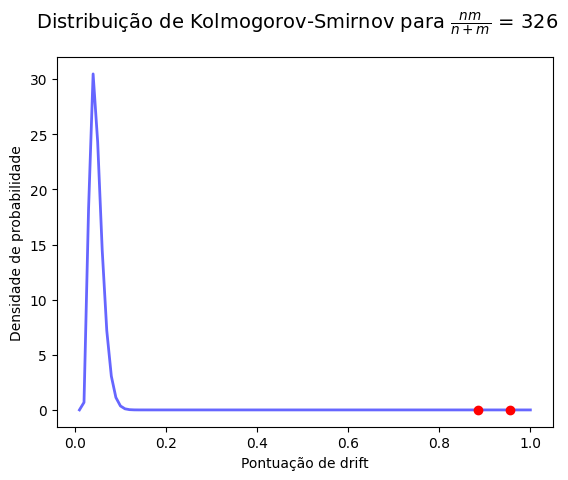

In [164]:
fig1, ax1 = plt1.subplots(1, 1)
x = np.linspace(0.01, 1, 100)
ax1.plot(x, stats.kstwo.pdf(x, coefN), 'b-', lw=2, alpha=0.6, label='kstwo pdf')
plt1.plot(top1_drift_score,stats.kstwo.pdf(top1_drift_score, coefN), color="red", marker='o')
plt1.plot(top2_drift_score,stats.kstwo.pdf(top2_drift_score, coefN), color="red", marker='o')

ax1.set_xlabel("Pontuação de drift")
ax1.set_ylabel("Densidade de probabilidade")
fig1.suptitle(r'Distribuição de Kolmogorov-Smirnov para $\frac{nm}{n+m}$ = '+f'{coefN}', fontsize=14)

plt1.savefig("distr_ks_674.png")
plt1.show()

In [165]:
# p-value
print(stats.kstwo.sf(0.18634012839651193, n))

2.2078802787043657e-10
